In [1]:
# Importing Core Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Tree
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machines
from sklearn.svm import SVC

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Data Splitting and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Metrics for Model Evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import warnings
warnings.simplefilter("ignore", FutureWarning)

# Iris dataset
from sklearn.datasets import load_iris

In [2]:
df = load_iris(as_frame=True).data
df['Species'] = load_iris().target
df['Species'] = df['Species'].map({
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica',
})

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


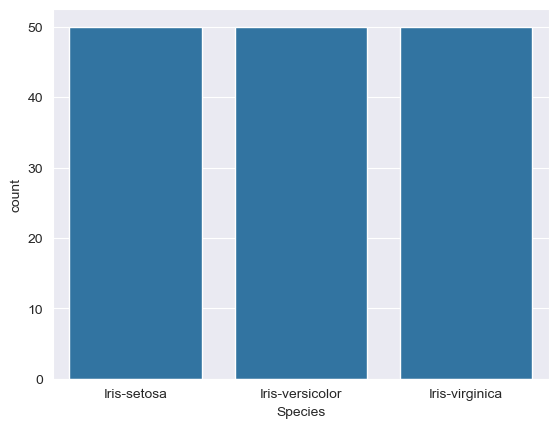

In [7]:
sns.countplot(data=df, x='Species');

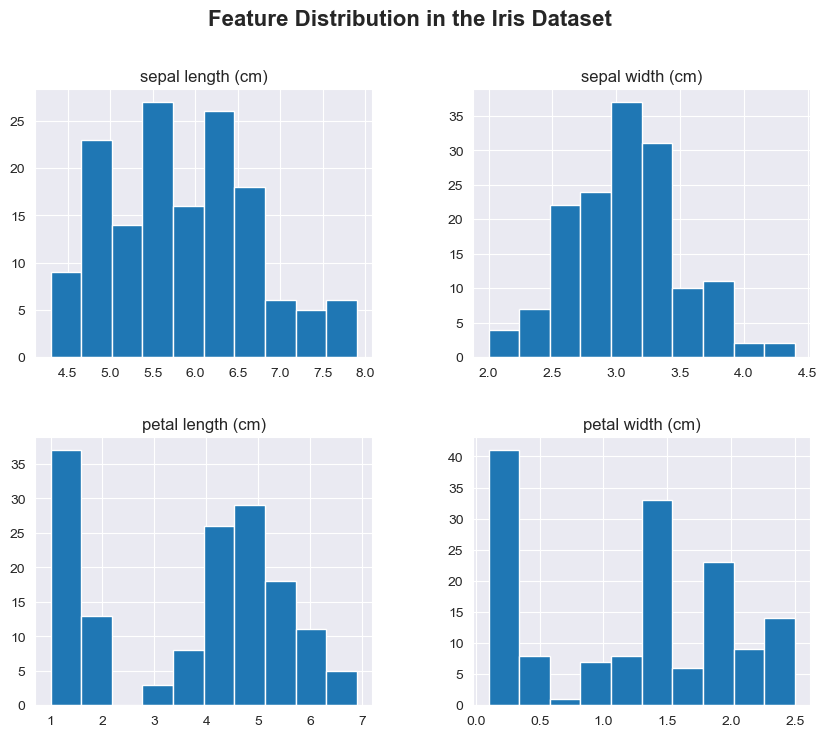

In [8]:
df.hist(figsize=(10, 8));
plt.suptitle("Feature Distribution in the Iris Dataset", fontsize=16, fontweight='bold');
plt.subplots_adjust(hspace=0.3);

C:\Users\Sasha\miniconda3\envs\akgpu2-skillbox-clone\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


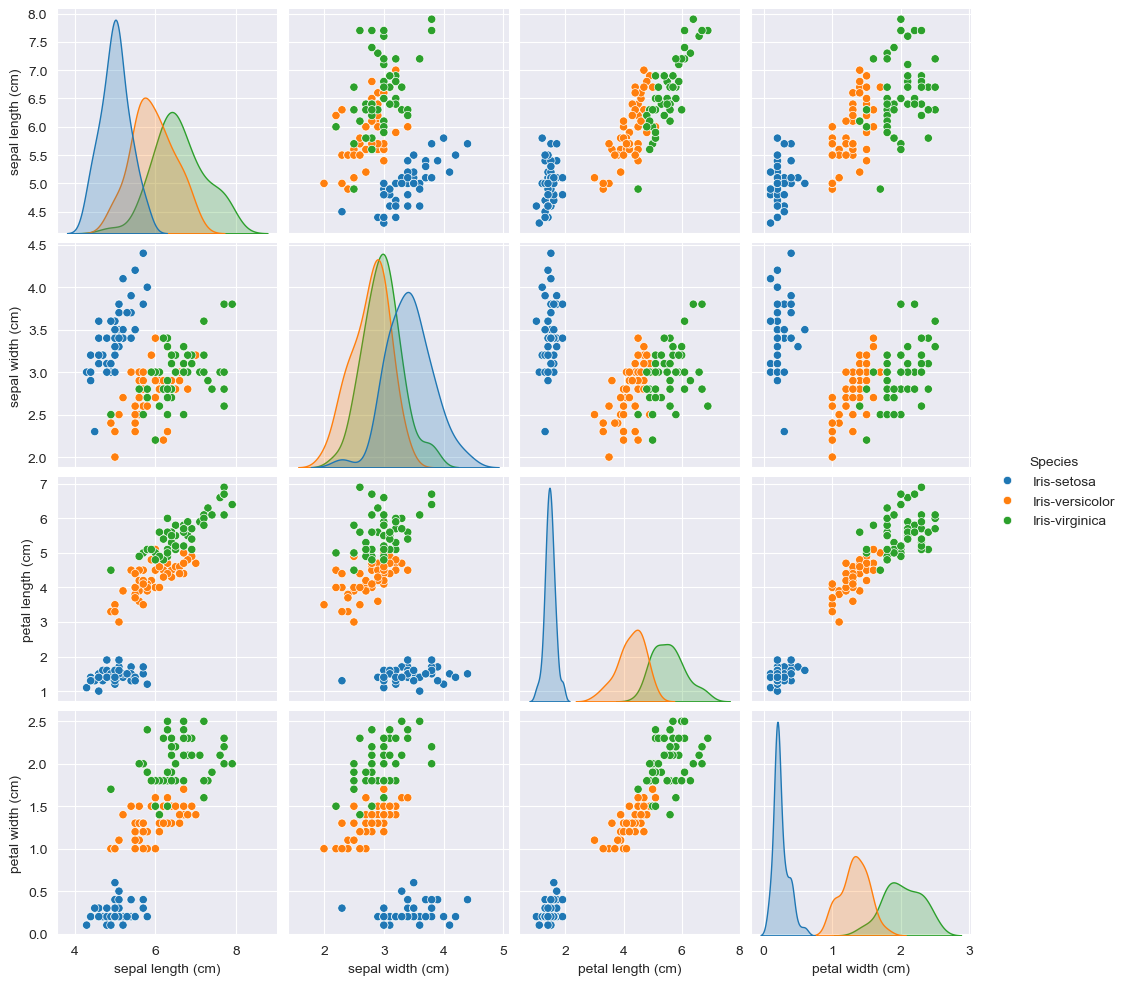

In [9]:
sns.pairplot(df, hue='Species');

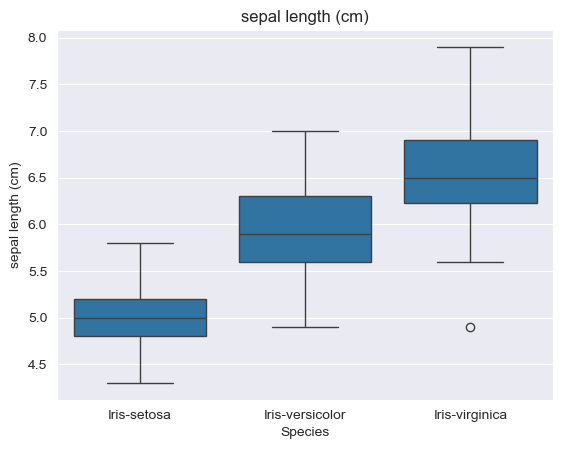

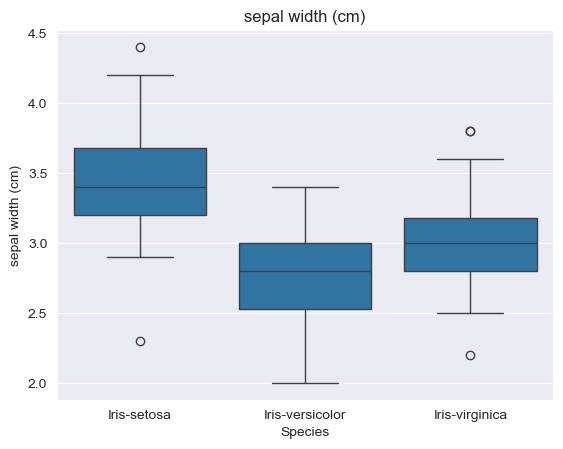

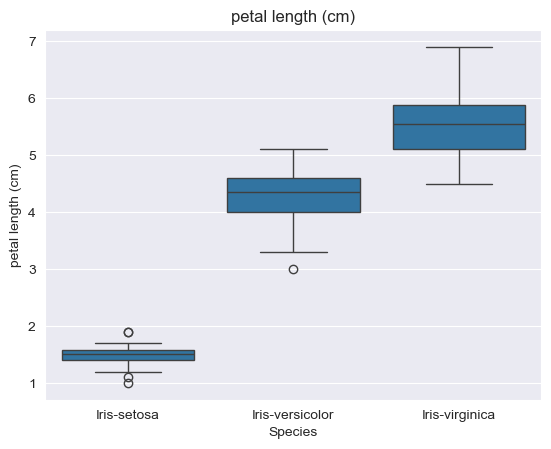

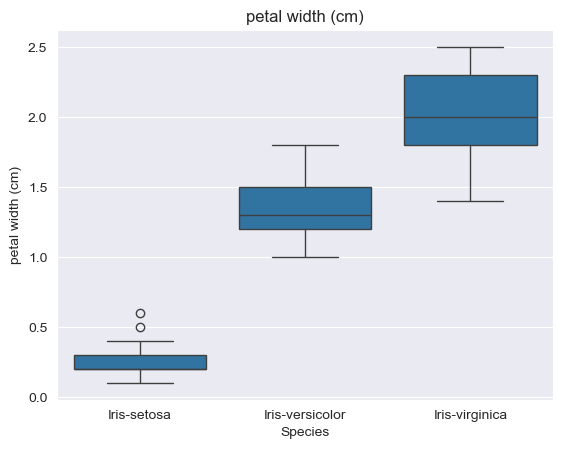

In [10]:
for column in df.drop('Species',axis=1): 
    sns.boxplot(x='Species', y=column, data=df)
    plt.title(column)
    plt.show()
    

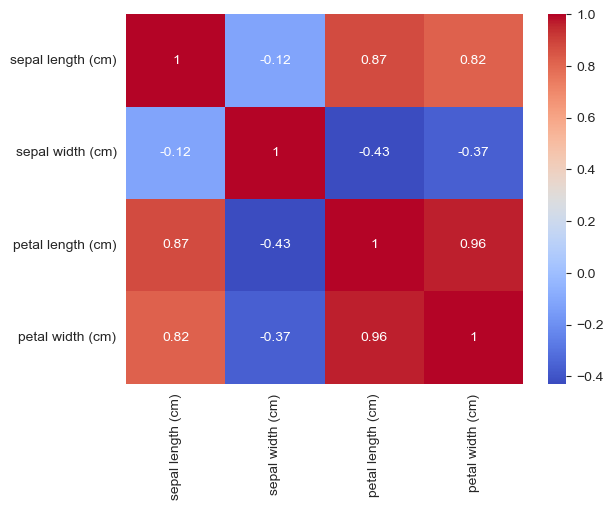

In [11]:
sns.heatmap(df.drop('Species',axis=1).corr(), annot=True, cmap='coolwarm');

In [12]:
X = df.drop('Species', axis=1)
y = df['Species']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
def model(model, X_train, X_test, y_train, y_test, class_names):
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"{model.__class__.__name__} - Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
        
    print(f"{model.__class__.__name__} - Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred,  display_labels=class_names,cmap='Blues'  )
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")

LogisticRegression - Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

LogisticRegression - Confusion Matrix:


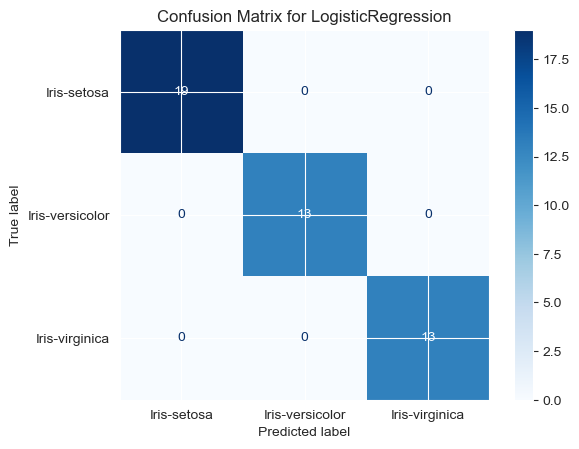

In [14]:
#LogisticRegression
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
model(LogisticRegression(), scaled_X_train, scaled_X_test, y_train, y_test, class_names)

KNeighborsClassifier - Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

KNeighborsClassifier - Confusion Matrix:


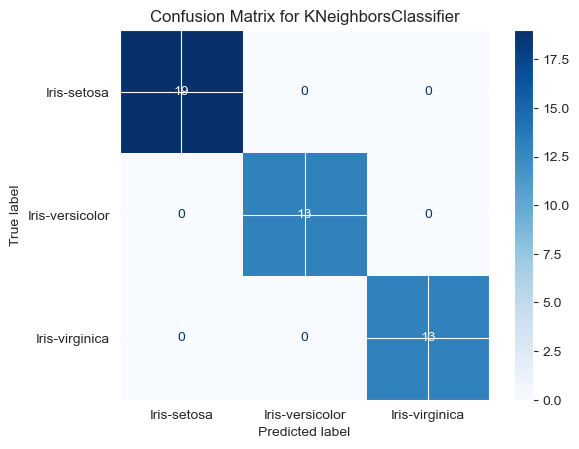

In [15]:
#KNeighborsClassifier
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
model(KNeighborsClassifier(), scaled_X_train, scaled_X_test, y_train, y_test, class_names)

SVC - Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

SVC - Confusion Matrix:


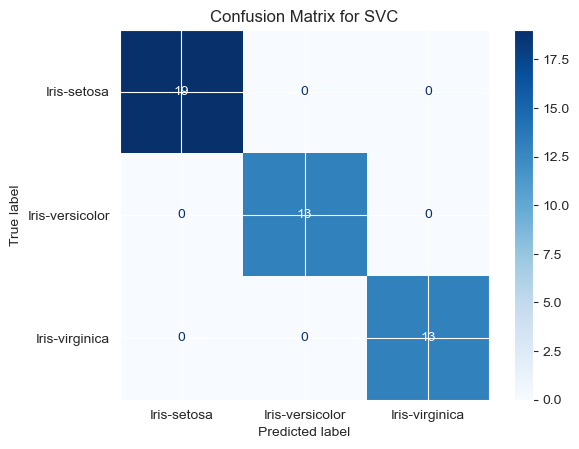

In [16]:
#SVC
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
model(SVC(), scaled_X_train, scaled_X_test, y_train, y_test, class_names)

RandomForestClassifier - Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

RandomForestClassifier - Confusion Matrix:


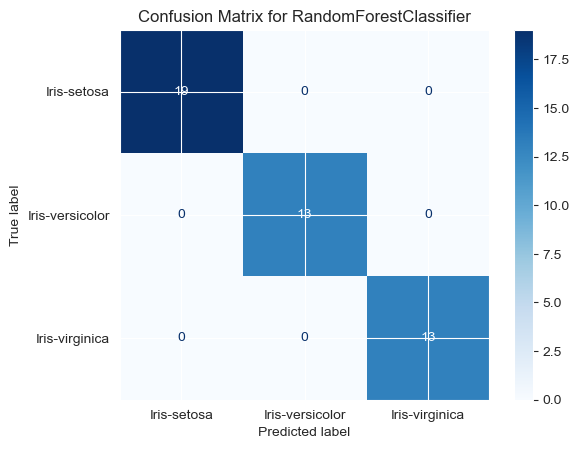

In [17]:
#RandomForestClassifier
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
model(RandomForestClassifier(), scaled_X_train, scaled_X_test, y_train, y_test, class_names)